In [1]:
# Copyright (c) 2020-present, Royal Bank of Canada.
# All rights reserved.
#
# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.
#

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from math import log, log2
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import trange
from u4ml.plot import MeansPlotter
from raps.exp import Exp

plt.rcParams.update({'font.size': 24})

## Erdos-Renyi

Output()

  0%|          | 0/20 [00:00<?, ?it/s]

  x = asanyarray(arr - arrmean)


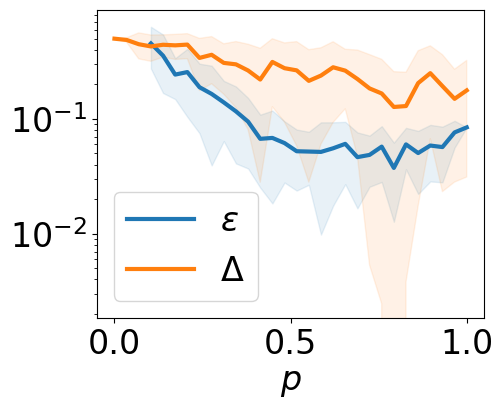

In [4]:
num_nodes = 10

fig = plt.figure(figsize=(5, 4))
plt.xlabel(r"$p$")
with MeansPlotter.make_autoclear_context() as probs_plotter:
  plt.semilogy()
  plotter = probs_plotter
  for i in trange(20):
    probs = np.linspace(0, 1, num=30)
    for p in probs:
      adj = Exp.make_erdos_renyi(num_nodes, p)
      pcm = Exp.make_bandit(adj=adj).pcm
      eps, gap = pcm.min_eps_gap(num_nodes - 1)
      plotter.extend(rf"$\epsilon$", [p], [eps])
      plotter.extend(rf"$\Delta$", [p], [gap])
    plotter.means(lw=3)

In [5]:
plt.sca(probs_plotter.lines_plotter.ax)
plt.savefig("graphics/epsgap-probs.pdf", format="pdf",
            dpi=1200, bbox_inches="tight")

Output()

  0%|          | 0/20 [00:00<?, ?it/s]

  x = asanyarray(arr - arrmean)


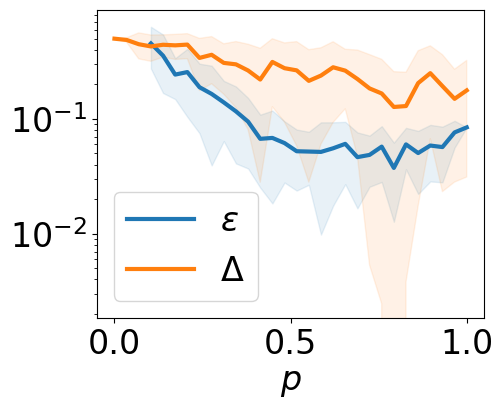

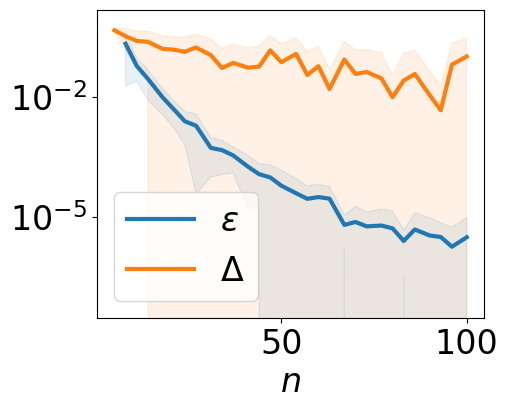

In [6]:
fig = plt.figure(figsize=(5, 4))
plt.xlabel(r"$n$")

with MeansPlotter.make_autoclear_context() as num_nodes_plotter:
  plt.semilogy()
  plotter = num_nodes_plotter
  for i in trange(20):
    num_nodes = np.linspace(5, 100, num=30).astype(int)
    for nnodes in num_nodes:
      adj = Exp.make_erdos_renyi(nnodes, log(log(nnodes)) / log(nnodes))
      pcm = Exp.make_bandit(adj=adj).pcm
      eps, gap = pcm.min_eps_gap(nnodes - 1)
      plotter.extend(rf"$\epsilon$", [nnodes], [eps])
      plotter.extend(rf"$\Delta$", [nnodes], [gap])
    plotter.means(lw=3)

In [7]:
plt.sca(num_nodes_plotter.lines_plotter.ax)
plt.savefig("graphics/epsgap-num-nodes.pdf", format="pdf",
            dpi=1200, bbox_inches="tight")

Output()

  0%|          | 0/20 [00:00<?, ?it/s]

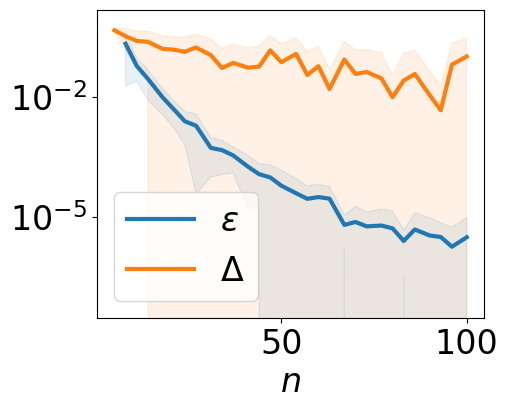

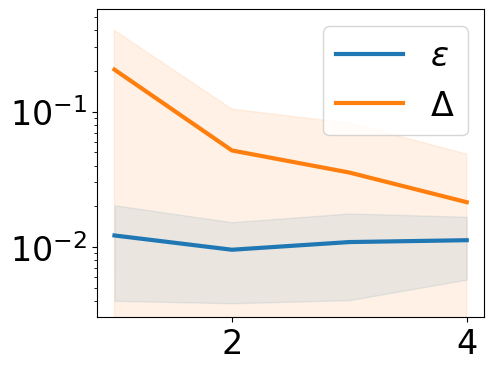

In [8]:
num_nodes = 16
prob = log2(log2(log2(num_nodes))) / log2(log2(num_nodes))

plt.figure(figsize=(5, 4))
with MeansPlotter.make_autoclear_context() as num_parents_plotter:
  plt.semilogy()
  plotter = num_parents_plotter
  for i in trange(20):
    num_parents = [1, 2, 3, 4]
    for n in num_parents:
      adj = Exp.make_erdos_renyi(num_nodes, prob, n)
      pcm = Exp.make_bandit(adj=adj).pcm
      eps, gap = pcm.min_eps_gap(num_nodes - 1)
      plotter.extend(rf"$\epsilon$", [n], [eps])
      plotter.extend(rf"$\Delta$", [n], [gap])
    plotter.means(lw=3)

In [9]:
plt.sca(num_parents_plotter.lines_plotter.ax)
plt.xlabel(r"$|\mathcal{P}|$")
plt.savefig("graphics/epsgap-num-parents.pdf", format="pdf",
            dpi=1200, bbox_inches="tight")